---

# Exercise 2: Analysis of global earthquake data


# Introduction to the subsurface

In module 1 of this course you have looked at data from the Earth's surface. These data are two-dimensional, which means that you need two coordinates to find any of these data (x and y, or latitude and longitude). In exercise 1a and 1b in this module (module 2) we introduced a new "coordinate", which is time, and we used timeseries data to study Earth's climate history. In this exercise we will work with data that has three dimensions, an x and y coordinate to locate our place on the surface of the Earth, and depth, which defines how deep below the surface our datapoints are located.

Studying the earth below our feet is an important part of the earth sciences. The subsurface, surface and atmosphere of our planet influence each other and are linked together in one system. Studying the subsurface is important for many applications, such as CO2 storage, geothermal energy, mineral resources, and for geohazards, such as earthquakes that we will discuss today.

The main methods that researchers use to study the subsurface are boreholes and geophysical data, such as seismic data or georadar, which can generate images of the subsurface. See for example the seismic image of a part of the North Sea below. Boreholes provide direct access to a small part of the subsurface, and samples from boreholes provide us with a lot of information, including the paleoclimate data that you studied in exercise 1b.

<img src="https://www.uib.no/sites/w3.uib.no/files/styles/content_main_wide_1x/public/media/seismic_section_nvg_22_june_2022.jpg?itok=IPO_3A7T&timestamp=1656012298" width="600" />

*Example of a seismic image of the subsurface in the North Sea. Source: https://www.uib.no/en/rg/gbs/155225/high-displacement-faults-project*


## Earthquakes

One indirect but very useful source of information on the subsurface is earthquakes. Earthquakes are ["the shaking of the Earth's surface resulting from a sudden release of energy in the lithosphere that creates seismic waves"](https://en.wikipedia.org/wiki/Earthquake). You will probably have heard about or seen earthquakes in the news, such as the devastating [earthquake in Turkey and Syria](https://en.wikipedia.org/wiki/2023_Turkey%E2%80%93Syria_earthquakes) in 2023. Earthquakes are a major hazard, and studying earthquakes will hopefully help to be prepared and to miminize the damage caused by these quakes.

Most earthquakes are caused by the natural movement of different blocks of the earth's subsurface relative to each other. This movement is often not smooth, but occurs in small jumps that create earthquakes.

Earthquakes have a lot to teach us about how our planet works. The arrival times of seismic waves from an earthquake at different seismic stations on the surface provides us with the means to triangulate and locate these earthquakes. The reconstruction of the seismic wave paths and velocities has provided us with information on the structure of the earth, such as the fact that the [earth's subsurface contains different layers](https://en.wikipedia.org/wiki/Internal_structure_of_Earth), like the crust, the mantle and a core. You can learn more on this later in the exercise.

The department of Earth Science at our university is very active in geophysics and the study of earthquakes (also known as seismology), and hosts the Norwegian National Seismic Network. You can read more about their activities here: https://www.uib.no/en/rg/geophysics/54014/earthquake-seismology, or look at recent earthquakes in Norway and surrounding areas here: https://nnsn.geo.uib.no/nnsn/#/

<img src="https://riskfrontiers.com/wp-content/uploads/2023/02/Picture8.jpg" width="500" />

*Example of ground displacement by the 2023 Turkey/Syria earthquake. Source: https://riskfrontiers.com*

<img src="https://www.isc.ac.uk/images/isclocatedevents.png" width="500" />


*Global earthquake locations (source: ICS). We will work with similar data in this exercise*

## This exercise

In this exercise we will visualize and analyse a large database of all global earthquakes that have magnitude 5 or higher. The data are from [the international seismological centre](https://www.isc.ac.uk/). To analyse these data we will use new new mapping tools in Python, and new statistical analysis to see if two datasets are statistically different or not. Similarly to exercise 1b, we will try to use the data and our analyses to answer a set of research questions.


## Assignments and handing in this exercise

This exercise contains assignments, where you will have to either complete some Python code or write text in a text block. Please hand in the assignment by modifying this notebook and handing in the completed notebook file on mitt.uib. You can download the notebook by selecting File > Download > Download .ipynb.

---

# Research questions

In this exercise we will try to answer the following research questions:

1. What is the spatial and depth distribution of earthquakes globally, and how is the magnitude distributed?
2. What is the relation between the location of plate boundaries and earthquakes?
3. How do the different types of plate boundaries affect the depth, magnitude and spatial distribution of earthquakes?
4. What is the relation between the crust and lithosphere and the distribution of earthquakes?

We will spend the next few sections visualizing and analysing earthquake data. The results will enable us to answer the research questions above.

---

# Section 1: Obtaining and visualizing global earthquake data

First we will start by loading the Python modules that we need

In [48]:
import itertools
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as pl

We also need a few additional modules. We need something to make nice maps, which can be done using the module [cartopy](https://scitools.org.uk/cartopy/docs/latest/). In addition we will install [a module](https://www.fabiocrameri.ch/colourmaps/) that provides us with nicer colors. The code block below installs this:

In [49]:
# install the cartopy module, for making nice maps
!pip install -q cartopy
!pip install -q cmcrameri

import cartopy.crs as ccrs
from cmcrameri import cm

Next we will download global earthquake data from the [International Seismological Centre](http://www.isc.ac.uk/iscgem/). We will restrict ourselves to large earthquakes with magnitude 5 or higher.

In [50]:
# specify the file location of the earthquake data:
global_earthquake_file = "https://github.com/ElcoLuijendijk/intro_earth_science_informatics/raw/refs/heads/main/data/earthquakes_global_ics.csv"

# read the global earthquake datafile
df = pd.read_csv(global_earthquake_file)

# convert earthquake dataset to a geodataframe (a dataframe with coordinates)
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(df.lon, df.lat, crs="EPSG:4326"), data=df)

Let's have a look at the data:

In [51]:
gdf

,date,lat,lon,smajax,sminax,strike,q,depth,unc,q.1,...,mtt,str1,dip1,rake1,str2,dip2,rake2,type,eventid,geometry
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,610326271,POINT (23.108 41.802)
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,16957813,POINT (23.249 41.758)
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,16957820,POINT (161.638 51.424)
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,16957819,POINT (160.277 52.763)
4,1904-08-30 11:43:20.85,30.684,100.608,16.9,14.4,118.4,C,15.0,25.0,C,...,,,,,,,,,16957826,POINT (100.608 30.684)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70876,2020-12-29 23:34:57.48,-0.856,-21.097,6.2,4.3,139.8,A,10.6,3.7,A,...,2.42,83,85,169,174,79,5,BDC,619628341,POINT (-21.097 -0.856)
70877,2020-12-30 00:35:28.18,36.519,140.569,5.1,4.0,108.5,A,53.3,5.2,A,...,-0.08,18,58,89,200,32,92,BDC,624898195,POINT (140.569 36.519)
70878,2020-12-31 10:18:54.45,-8.733,122.233,5.4,4.1,62.8,A,130.8,6.0,A,...,3.34,165,42,-17,268,79,-130,BDC,619630527,POINT (122.233 -8.733)
70879,2020-12-31 19:50:17.87,-0.793,146.809,6.5,4.7,62.8,A,14.4,3.7,A,...,-4.07,90,18,78,283,73,94,BDC,619630706,POINT (146.809 -0.793)


The data that we loaded is now a [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which is a convenient way to work with data in Python, and is in effect a type of excel sheet or data table in Python. The dataframe is called `gdf`, and you can access each column like this `gdf["lat"]` for the column called lat, `gdf["depth"]` for the column named depth, and so on. We will use this to to calculations, and make figures of the values in these columns. 

There's quite a few data columns in the file above, but the most important ones are there, latitude (`lat`), longitude (`lon`) and depth below the surface (`depth`), which means that we have all the coordinates that we need to locate the data. Let's get started with our data analysis

---

# Section 2: The location, depth and magntiude of global earthquakes

Now that we have the data we can get going with analysing global earthquakes. First let's make a nice map of the earthquake locations and their magnitude.

However, before we start, let's first pick a colormap, i.e. a set of colors to make our figures. The standard colors in Python and matplotlib are nice, but there are much nicer colormaps available. We will use use a colormap from this collection: https://www.fabiocrameri.ch/colourmaps/ 

In addition, as you learned in Module 1, for each map that we make we need to define a projection, which specifies how we go from data on a round earth to a flat screen or piece of paper. In this case we will use the [Robinson projection](https://en.wikipedia.org/wiki/Robinson_projection). If you want to try out some alternative options, you can look here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

In [52]:
# pick a colormap, see https://www.fabiocrameri.ch/colourmaps/ for options
cmap = cm.imola

# choose a map projection, see here for some options: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
proj = ccrs.Robinson()

Next, lets get going with making a map of the global earthquake data:

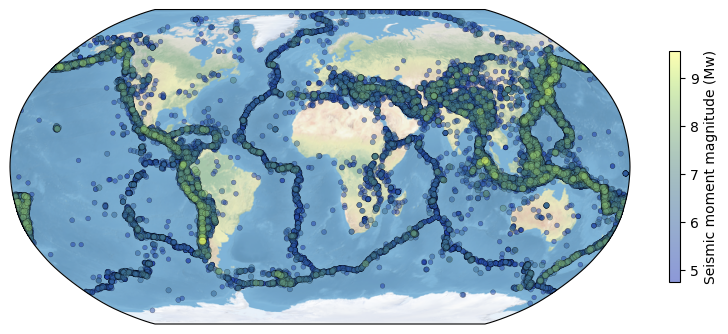

In [53]:
# make a figure and axis with the specified projection
fig = pl.figure(figsize=(10, 6))
ax = pl.axes(projection=proj)

# add a background image
ax.stock_img()

# sort the earthquakes by magnitude, so that the larger ones are plotted on top of the smaller ones
gdf_sort = gdf.sort_values(by="mw")

# plot all the earthquakes, with a color and size related to their magnitude
eq_plot = ax.scatter(gdf_sort.geometry.x.values, gdf_sort.geometry.y.values,
                     c=gdf_sort["mw"].values, cmap=cmap, edgecolor="black",
                     lw=0.25, s=gdf_sort["mw"].values **1.5,
                     transform=ccrs.PlateCarree(), alpha=0.5)

# add a colorbar, based on the colormap of the earthquake plot
mappable = ax.collections[0]
cb = fig.colorbar(eq_plot, shrink=0.5)
cb.set_label("Seismic moment magnitude (Mw)")

As you can see in the result, the earthquakes line up suspiciously along lines in the ocean and along edges of the continents. We will get back to this below.

But first lets have a look at the magnitude of the earthquakes. You may have heard mention of earthquake magnitudes in the news. There are different magnitude scales, but the one that we will use here is the [seismic moment magnitude scale](https://en.wikipedia.org/wiki/Moment_magnitude_scale), which is the generally accepted scale in research. This scale replaces the older Richter scale for the magnitude of earthquakes that you may have heard about. Let's look at the distribution of global earthquakes:

Text(0, 0.5, 'Number of earthquakes')

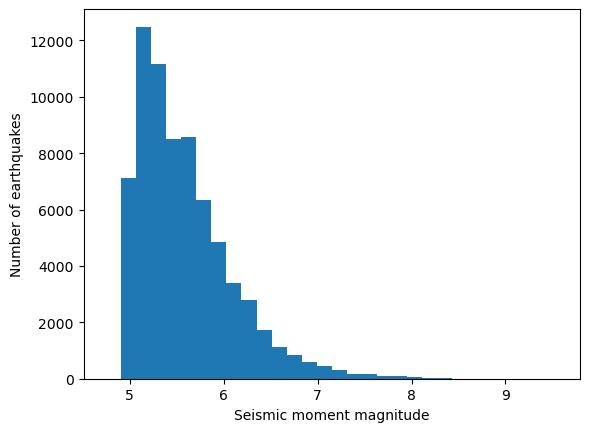

In [54]:
# create a figure with one subplot
fig, ax = pl.subplots(1, 1)

# create a histogram of the earthquake magnitudes
h = ax.hist(gdf["mw"], bins=30)

# add labels
ax.set_xlabel("Seismic moment magnitude")
ax.set_ylabel("Number of earthquakes")

And finally let's have a look at the third dimension, depth, to get an idea at what depth most earthquakes originate. We will first plot a figure of the depth of the global earthquake data:

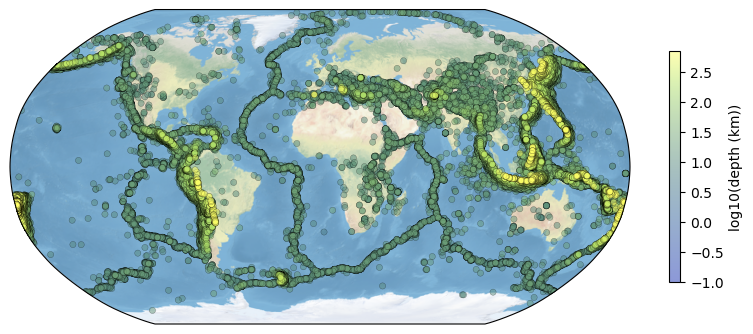

In [55]:
fig = pl.figure(figsize=(10, 6))
ax = pl.axes(projection=proj)

ax.stock_img()

gdf_sort = gdf.sort_values(by="depth", ascending=True)

eq_plot = ax.scatter(gdf_sort.geometry.x.values, gdf_sort.geometry.y.values,
                     c=np.log10(gdf_sort["depth"].values), cmap=cmap, edgecolor="black",
                     lw=0.25, s=20,
                     transform=ccrs.PlateCarree(), alpha=0.5)

mappable = ax.collections[0]
cb = fig.colorbar(eq_plot, shrink=0.5)
cb.set_label("log10(depth (km))")

Note that we have log-transformed depth in the figure above, to better visualize the distribution. We use a base 10 [logarithm](https://en.wikipedia.org/wiki/Logarithm) (logaritme med grunntal 10). Just to remind you: The base 10 logarithm of 10 equals 1, for 100 it equals 2, $\log_{10}(1000) = 3$, and so on.

And next, we look at the distribution of global earthquake depths:

(0.5, 3.0)

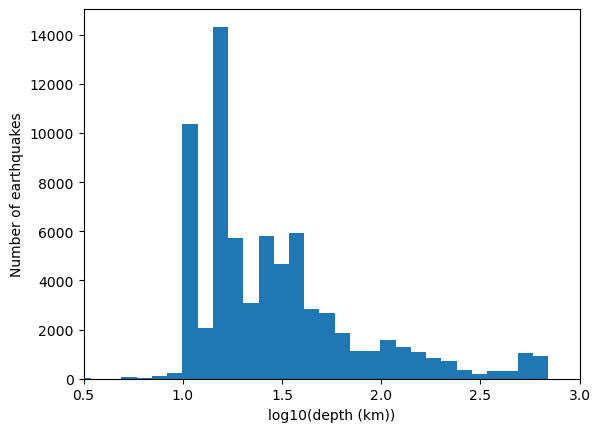

In [56]:
# take the logarithm of the depth values, but set depth=0 to NaN (we cannot take the log of 0)
# to avoid issues with plotting
# (this will just not plot the earthquakes with depth=0)
log_depth = np.log10(gdf["depth"])
log_depth[gdf["depth"] == 0] = np.nan

# create a figure with one subplot
fig, ax = pl.subplots(1, 1)

# create a histogram of the logarithm of the earthquake depths
ax.hist(log_depth, bins=50)

# add labels
ax.set_xlabel("log10(depth (km))")
ax.set_ylabel("Number of earthquakes")

ax.set_xlim(0.5, 3.0)

---

# Section 3: Plate tectonics and earthquakes


## Introduction: plate tectonics

[Plate tectonics](https://en.wikipedia.org/wiki/Plate_tectonics) is arguably the latest major scientific advance in the natural sciences. It took its final form in the 1950s and 1960s, and is therefore younger than other major new theories in the 20th century, such as general and special relativity, quantum mechanics and quantum field theory. It revolutionized geology and all of a sudden made it possible to make sense of the way the earth looks, why there are deep ocean trenches, sedimentary basins, mountain belts and so on.

Before plate tectonics geologist had come up with several complicated theories to explain what they observed. A popular idea was the [expanding earth theory](https://en.wikipedia.org/wiki/Expanding_Earth), which proposed that earth was continuously expanding to explain the creation of new ocean crust at spreading ridges. Other geologist working in mountain belts had proposed a [shrinking earth](https://en.wikipedia.org/wiki/Geophysical_global_cooling) instead, to explain why the rocks there had been shoved on top of each other. These two theories obviously do not work well together.

Arguably the paper that finally put together all the pieces of the puzzle of plate tectonics to explain sea floor spreading, the subduction and the collision of plates and the formation of mountain belts is the paper [Rises, trenches, great faults, and crustal blocks](https://doi.org/10.1029/JB073i006p01959) by Jason Morgan in 1968, who proposed that the outer shell of the earth consists of several rigid plates that move away from each other at ocean ridges, towards each other at collision or subduction zones, and along each other at transform zones.

The development of plate tectonics started much earlier with the theory of continental drift proposed by several scientist in the late 19th and early 20th century, perhaps the most well known is Alfred Wegener. Maps and data of ocean ridges in the 1960 proved that new crust is generated there by magma and that each side of the ridge moves apart slowly, such as the map by Heezen and Tharp below.

The history of plate tectonics is fascinating, if you want to read more about this I can warmly recommend the book "Plate Tectonics: An Insider's History Of The Modern Theory Of The Earth" by Naomi Oreskes, with a nice summary [here](https://doi.org/10.1038/501027a)

<img src="https://images.theconversation.com/files/349478/original/file-20200726-29-189de0o.jpg?ixlib=rb-4.1.0&rect=31%2C4%2C2968%2C1715&q=45&auto=format&w=1000&fit=clip" width="400" />

*Hand-painted rendition of Heezen-Tharp 1977 World ocean floor map, by Heinrich Berann. Library of Congress, Geography and Map Division, CC BY-ND*

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Tectonic_plates_%282022%29.svg/800px-Tectonic_plates_%282022%29.svg.png" width="400" />

*Our current understanding of the major tectonic plates on our planet. Source: Wikipedia, based on [Hasterok et al. (2022)](https://doi.org/10.1016/j.earscirev.2022.104069)*


<img src="https://www.researchgate.net/profile/G-Scalera/publication/270395664/figure/fig1/AS:669490312388614@1536630337284/The-Workshop-poster-graphic-design-by-Barbara-Angioni-of-the-INGV-Graphics-Lab_W640.jpg" width="200" />

*Interestingly, even though it was falsified, the expanding Earth theory was still alive and had a handful of followers a decade ago*


## 3.1 Getting plate boundary data

Now that we have learned about plate tectonics, we will try and see how earthquakes are connected with tectonic plates. To analyze this we will use data on the location and type of plate boundaries from a recent paper by [Hasterok et al. (2022)](https://doi.org/10.1016/j.earscirev.2022.104069). These authors were so friendly as to share their data online [here](https://zenodo.org/records/6586972). We will download the plate boundary file below:

In [57]:
plate_bnd_file = "https://github.com/ElcoLuijendijk/intro_earth_science_informatics/raw/refs/heads/main/data/plate_boundaries.shp"

# read plate boundary file
plate_bnd = gpd.read_file(plate_bnd_file)

# select sinsitral and dextral transform plate bnds and rename them to transform
idx = (plate_bnd["type"] == "dextral transform") | (plate_bnd["type"] == "sinistral transform")
plate_bnd.loc[idx, "type"] = "transform"

Let's plot the plate boundaries that we have just loaded:

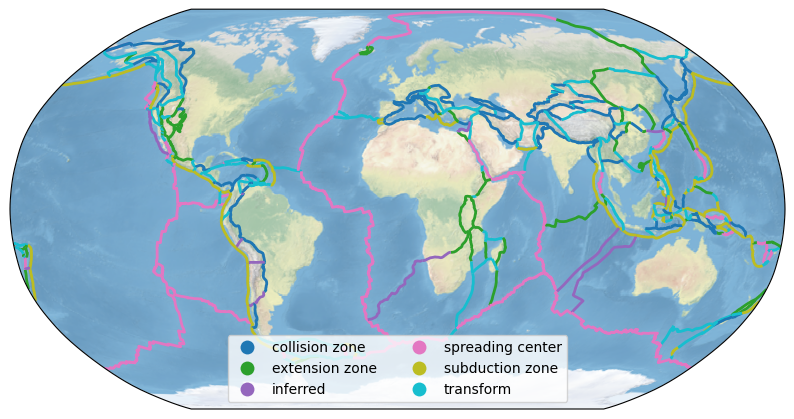

In [58]:
plate_bnd["colors"] = "tab:orange"


fig = pl.figure(figsize=(10, 6))
ax = pl.axes(projection=proj)

ax.stock_img()

plate_bnd_plot = plate_bnd.plot("type", ax=ax, zorder=1, lw=2.0,
                                transform=ccrs.PlateCarree(), legend=True,
                                legend_kwds={"ncol": 2, "loc": "lower center"})

## 3.2 Types of plate boundary

Above you can see the tectonic plates, and several different types of boundaries between these plates. The different plate boundaries are briefly explained below:

* Collision zone: This is the collision zone (convergent boundary) between two continental plates. Plates move towards each other.
* Extension zone: A zone where a plate is extended (stretched) but where the extension has not yet gone far enough to create new oceanic crust
* Spreading centre: A location where a plate that consists of oceanic crust moves apart and the gap is filled by magma that forms new oceanic crust
* Subduction zone: A zone where one tectonic plate subducts (sinks) below another
* Transform: A zone where two plates move past one another. A famous example is the [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault)
* Inferred: An unknown plate boundary

These different boundaries are illustrated in the drawings below:

<img src="https://cdn.britannica.com/34/3534-050-E46D8524/crust-Oceanic-destruction-theory-Production-Earth-plate.jpg" width="400" />

*Overview of subduction zones and oceanic ridges (or spreading centres). Source: https://www.britannica.com/science/subduction-zone*

<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Continental-continental_convergence_Fig21contcont.gif" width="300" />

*Diagram showing a collission zone between two continental plates, source: https://en.wikipedia.org/wiki/Continental_collision*

<img src="https://www.nps.gov/subjects/geology/images/transform-shear-zone-10x.jpg?maxwidth=650&autorotate=false&quality=78&format=webp" width="300" />

*Overview of a transform boundary or fault, see https://en.wikipedia.org/wiki/Transform_fault*




## 3.3 Distance of earthquakes to plate boundaries

The first relation between earthquakes and plate boundaries that we will look at is the distance between these two.

The plate boundary and earthquake data that we use have coordinates specified in degrees latitude and longitude. However, the distance that we would like to calculate should have units of meters or kilometers.

Here we use a fast, but somewhat inaccurate method to calculate the distance between the earthquakes and the plate boundaries. In the code blocks below we first calculate the distance in degrees latitude and longitude. We then convert this distance to units of km. We could do this more correctly and project our data to an [equal area projection](https://en.wikipedia.org/wiki/Equal-area_projection), where the coordinates have units of meters instead of degrees. Unfortunately, this turns out to be too slow in Google Colab, so we use the faster method instead.

<img src="https://www.geographyrealm.com/wp-content/uploads/2023/11/latitude-longitude-globes.jpg" width="600" />

*An explanation of latitude and longitude. Note that a degree longitude is a much longer distance near the equator than near the north or south pole. Source: https://www.geographyrealm.com/x-longitude-y-latitude/*



We will first calculate the distances between all earthquake points and plate boundaries in degrees:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time

# we will record the time it takes to run the distance calculations
start = time.time()

# subsample the earthquake dataset, keep one in five datapoints:
gdf = gdf[::5]

# set up an array to store the results
neq = gdf.shape[0]
n_bnds = plate_bnd.shape[0]
ds = np.ones((neq, n_bnds)) * 1e9
#ds_ll = np.ones((neq, n_bnds)) * 1e9

# go through all plate boundary segments:
print("Going through all plate boundary segments")
print("Note that this may take a few minutes. Feel free to get a coffee or tea.")
print("")

# go through each of the plate boundary segments
for i, pb in enumerate(plate_bnd.geometry[:]):

  # report to screen each 25 steps
  if i / 25.0 == i // 25.0:
    print(f"processing {i+1} of {len(plate_bnd)} plate boundary segments...")

  # create a buffer / zone of 5 degrees lat/long around the plate boundary
  pbb = pb.buffer(5.0)

  # find all the points within 5 degrees from the plate boundary
  idx = [pbb.contains(g) for g in gdf.geometry]
  gdfi = gdf.loc[idx]

  # calculate the distances between all points and the segment
  dist = gdfi.geometry.distance(pb)

  # store the distance
  ds[:, i][idx] = dist

# record the end time
endtime = time.time()

print("done")

print(f"duration: {endtime - start} sec")

Going through all plate boundary segments
Note that this may take a few minutes. Feel free to get a coffee or tea.

processing 1 of 571 plate boundary segments...
processing 26 of 571 plate boundary segments...
processing 51 of 571 plate boundary segments...
processing 76 of 571 plate boundary segments...
processing 101 of 571 plate boundary segments...
processing 126 of 571 plate boundary segments...
processing 151 of 571 plate boundary segments...
processing 176 of 571 plate boundary segments...
processing 201 of 571 plate boundary segments...
processing 226 of 571 plate boundary segments...
processing 251 of 571 plate boundary segments...
processing 276 of 571 plate boundary segments...
processing 301 of 571 plate boundary segments...
processing 326 of 571 plate boundary segments...
processing 351 of 571 plate boundary segments...
processing 376 of 571 plate boundary segments...
processing 401 of 571 plate boundary segments...
processing 426 of 571 plate boundary segments...
process

Next we calculate the shortest distance from the distances of the earthquakes to all plate boundaries that we have calculated above. Note that we calculate this distance in degrees latitudde/longitude still first:

In [60]:
# get the shortest distance for each earthquake from the distances to all plate boundaries
d_final = np.min(ds, axis=1)

# add nodata values
d_final[d_final==1e9] = np.nan

# add this to the dataset
gdf["distance_to_nearest_plate_bnd_degrees"] = d_final

Next, we need to convert the distance from degrees to a distance in meters. This is necessary, because one degree longitude is about 100 km at the equator, but decreases if you go north towards the northpole, so to make the comparison honest, we need distance in meters and not in degrees. We convert the distance using the so-called [haversine equation](https://en.wikipedia.org/wiki/Haversine_formula) below:

In [61]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    # convert decimal degrees to radians
    #lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    lon1r, lat1r, lon2r, lat2r = np.deg2rad(lon1), np.deg2rad(lat1), np.deg2rad(lon2), np.deg2rad(lat2)

    # haversine formula
    dlon = lon2r - lon1r
    dlat = lat2r - lat1r
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles

    return c * r

In [62]:
# get the shortest distances in degrees
xd = d_final

# create two points that are xd degrees apart in longitude at the latitude of the earthquake
long1 = gdf["lon"] - 0.5 * xd
lat1 = gdf["lat"]
long2 = gdf["lon"] + 0.5 * xd
lat2 = gdf["lat"]

# calculate the distance in km between these two points, using the haversine function that was defined above
dist_km = haversine(long1, lat1, long2, lat2)

# store the distance to the nearest plate boundary in the dataframe
gdf["distance_to_nearest_plate_bnd"] = dist_km

# some data cleaning, remove rows with no data:
gdf = gdf.dropna(subset="distance_to_nearest_plate_bnd")

Finally, lets plot the results to see how close earthquakes are to the plate boundaries:

Text(0, 0.5, 'Number of earthquakes')

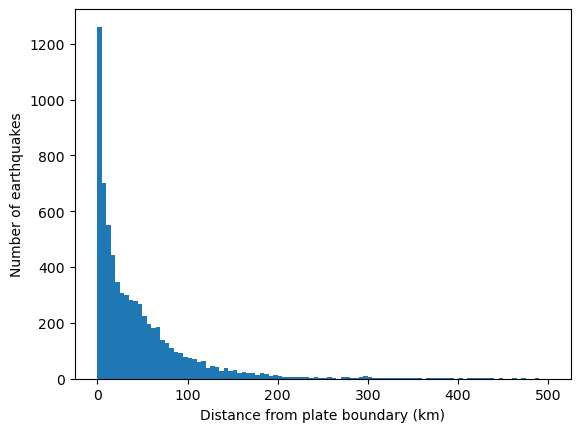

In [63]:
# creat a figure with one subplots
fig,ax = pl.subplots(1, 1)

# make a histogram of the distances
ax.hist(gdf["distance_to_nearest_plate_bnd"], bins=np.linspace(0, 500, 101))

# add labels to the figure axes:
ax.set_xlabel("Distance from plate boundary (km)")
ax.set_ylabel("Number of earthquakes")

As you can see in the figure above most earthquakes are close to plate boundaries, and the number of earthquakes decreases as you go further away.

## 3.4 Differences between plate boundaries

Next we will look if we can find differences in eartquake distributions between the different types of plate boundary.

We first assign the closest plate boundary to each earthquake in our dataset:

In [64]:
# find the nearest plate boundary for each earthquake
ixs = [plate_bnd.sindex.nearest(g)[1][0] for g in gdf.geometry]

# record the plate boundary feature and type in the dataframe
gdf["plate_bnd"] = [plate_bnd.loc[ix, "feature"] for ix in ixs]
gdf["plate_bnd_type"] = [plate_bnd.loc[ix, "type"] for ix in ixs]

Next we plot the distances between each earthquake and the nearest plate, for each plate boundary type

Text(0, 0.5, 'Number of earthquakes')

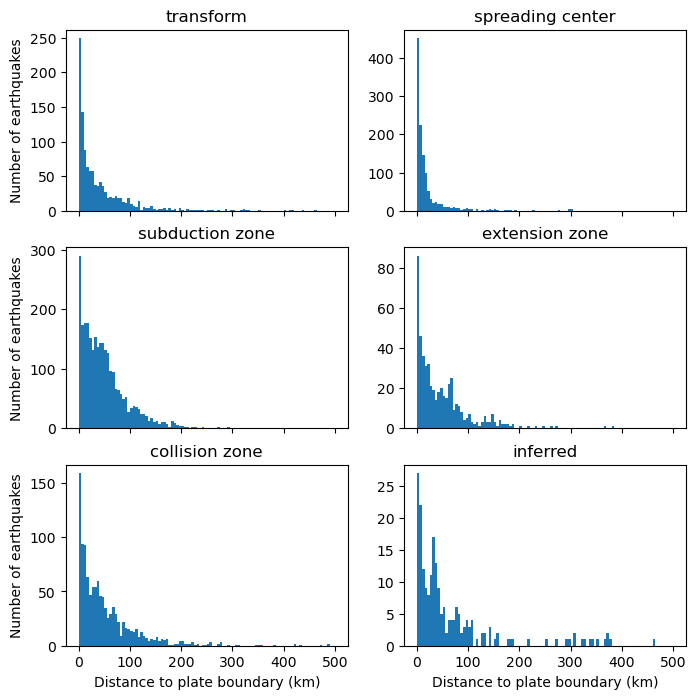

In [65]:
# get a list of all plate boundary types
plate_types = gdf["plate_bnd_type"].unique()

# create a figure with subplots for each plate boundary type
fig, axs = pl.subplots(3, 2, sharex=True, figsize=(8, 8))

# make the list of subplots a 1D array
axs = axs.ravel()

# go through all plate boundary types and make a histogram of distances for each type
for pt, ax in zip(plate_types, axs):

    # select only earthquakes that are closest to this plate boundary type
    idx = gdf["plate_bnd_type"] == pt
    
    # set the bins for the histogram
    # here we create 101 bins between 0 and 500 km using numpy's linspace function
    bins = np.linspace(0, 500, 101)

    # make a histogram of the distances for this plate boundary type
    ax.hist(gdf.loc[idx, "distance_to_nearest_plate_bnd"], bins=bins)
    ax.set_title(pt)

# add labels to the figure axes:
axs[-2].set_xlabel("Distance to plate boundary (km)")
axs[-1].set_xlabel("Distance to plate boundary (km)")

axs[0].set_ylabel("Number of earthquakes")
axs[2].set_ylabel("Number of earthquakes")
axs[4].set_ylabel("Number of earthquakes")

Lets also calculate some statistics for each plate boundary, such as the mean, [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) (std) and the 25, 50% and 75% [percentiles](https://en.wikipedia.org/wiki/Percentile):

In [66]:
for pt in plate_types:

    idx = gdf["plate_bnd_type"] == pt
    print(pt)
    print(gdf.loc[idx, "distance_to_nearest_plate_bnd"].describe())
    print("----")

transform
count    1121.000000
mean       44.770138
std        65.942967
min         0.023681
25%         6.020421
50%        20.693523
75%        56.374542
max       510.647600
Name: distance_to_nearest_plate_bnd, dtype: float64
----
spreading center
count    1231.000000
mean       24.597314
std        48.250412
min         0.000419
25%         2.737644
50%         8.806621
75%        20.349003
max       375.075210
Name: distance_to_nearest_plate_bnd, dtype: float64
----
subduction zone
count    2806.000000
mean       51.211387
std        48.960593
min         0.002723
25%        16.730001
50%        40.340738
75%        68.940971
max       545.637913
Name: distance_to_nearest_plate_bnd, dtype: float64
----
extension zone
count    514.000000
mean      48.284066
std       55.626407
min        0.019917
25%        9.588637
50%       31.642561
75%       66.513163
max      515.281969
Name: distance_to_nearest_plate_bnd, dtype: float64
----
collision zone
count    1129.000000
mean       54.

The histograms and statistics above hint at a difference for different plate boundaries. However, while we may see the differences clearly in some cases, in other cases these can be more subtle. One way to check if our visual interpretation of the histograms is right is the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), which tests if two distributions are the same or not. Similarly to the linear regression in the previous two exercises, it test a null hypothesis, but this time that the null hypothesis is the hypothesis that the two distributions are the same. If the probability of the null hypothesis is low (p < 0.05) then we can reject the null hypothesis and assume that the distributions of earthquakes are different. 

Below we test if the distribution of earthquake distance for each plate boundary is significantly different from the total distribution:

In [67]:
import scipy.stats

# go through each plate boundary type and perform a Kolmogorov-Smirnov test
for pt in plate_types:
    # select only earthquakes that are closest to this plate boundary type
    idx = gdf["plate_bnd_type"] == pt

    # perform the Kolmogorov-Smirnov test
    ks_test = scipy.stats.kstest(gdf.loc[idx, "distance_to_nearest_plate_bnd"], gdf["distance_to_nearest_plate_bnd"])
    
    # print the results to the screen
    print("-" * 10)
    print(pt)
    print("p value null hypothesis: ", ks_test.pvalue)

----------
transform
p value null hypothesis:  5.587149828150791e-05
----------
spreading center
p value null hypothesis:  9.926257983270425e-101
----------
subduction zone
p value null hypothesis:  1.0538154741848306e-31
----------
extension zone
p value null hypothesis:  0.10739483565469309
----------
collision zone
p value null hypothesis:  0.0001735940287633629
----------
inferred
p value null hypothesis:  0.015869325518815095


Let's also see if we can find differences in earthquake magnitude between the different plate boundaries. We will again plot histograms, summary statistics and Kolmogorov-Smirnov test results:

Text(0, 0.5, 'Number of earthquakes')

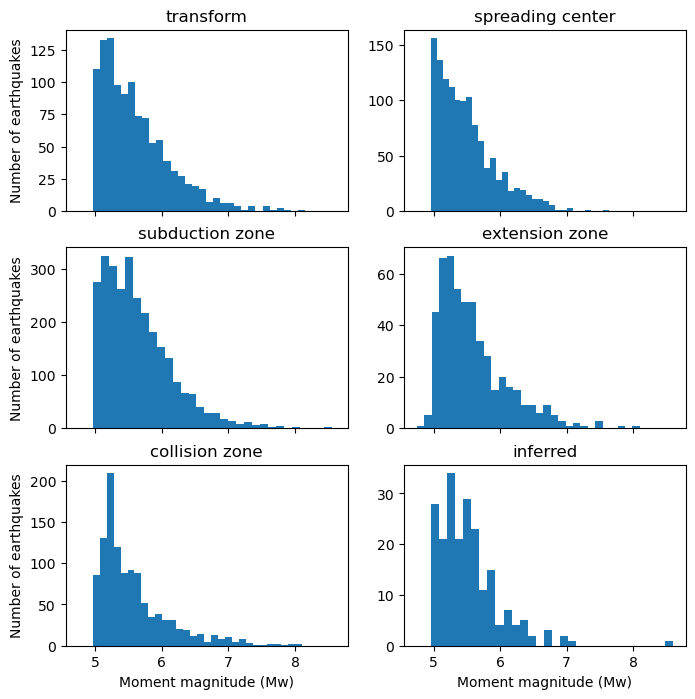

In [68]:
# create a figure with 3x2 subplots

fig, axs = pl.subplots(3, 2, sharex=True, figsize=(8, 8))
axs = axs.ravel()

# go through all plate boundary types and make a histogram of distances for each type
for pt, ax in zip(plate_types, axs):

    idx = gdf["plate_bnd_type"] == pt
    ax.hist(gdf.loc[idx, "mw"], bins=30)
    ax.set_title(pt)

# add albels to the figure axes:
axs[-2].set_xlabel("Moment magnitude (Mw)")
axs[-1].set_xlabel("Moment magnitude (Mw)")

axs[0].set_ylabel("Number of earthquakes")
axs[2].set_ylabel("Number of earthquakes")
axs[4].set_ylabel("Number of earthquakes")

In [69]:
print("Mw for different plate bnds:\n")

for pt in plate_types:
    
    print("----")
    idx = gdf["plate_bnd_type"] == pt
    print(pt)
    print(gdf.loc[idx, "mw"].describe())
    

Mw for different plate bnds:

----
transform
count    1121.000000
mean        5.599429
std         0.519198
min         4.960000
25%         5.190000
50%         5.490000
75%         5.870000
max         8.150000
Name: mw, dtype: float64
----
spreading center
count    1231.000000
mean        5.486093
std         0.428747
min         4.960000
25%         5.145000
50%         5.400000
75%         5.700000
max         7.630000
Name: mw, dtype: float64
----
subduction zone
count    2806.000000
mean        5.634458
std         0.523931
min         4.960000
25%         5.230000
50%         5.540000
75%         5.900000
max         8.560000
Name: mw, dtype: float64
----
extension zone
count    514.000000
mean       5.591498
std        0.512864
min        4.750000
25%        5.210000
50%        5.470000
75%        5.825000
max        8.100000
Name: mw, dtype: float64
----
collision zone
count    1129.000000
mean        5.569185
std         0.532064
min         4.960000
25%         5.190000
50%

In [70]:
import scipy.stats

for pt in plate_types:

    idx = gdf["plate_bnd_type"] == pt
    ks_test = scipy.stats.kstest(gdf.loc[idx, "mw"], gdf["mw"])
    
    print("-" * 10)
    print(pt)
    print("p value null hypothesis: ", ks_test.pvalue)

----------
transform
p value null hypothesis:  0.41977291612049233
----------
spreading center
p value null hypothesis:  8.585054546817214e-06
----------
subduction zone
p value null hypothesis:  1.7501833798925078e-06
----------
extension zone
p value null hypothesis:  0.9633564817039149
----------
collision zone
p value null hypothesis:  0.0006057672862442658
----------
inferred
p value null hypothesis:  0.12825433692024094


And finally we will look at the differences in eartquake depth, and if they are affected by plate boundary type. Note that we log-transform the depth here to visualize the results better.

Text(0, 0.5, 'Number of earthquakes')

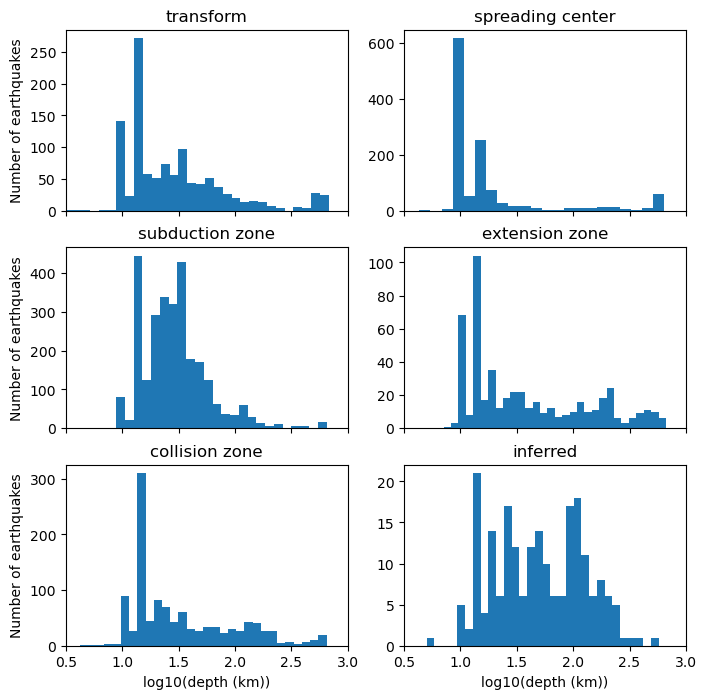

In [71]:
fig, axs = pl.subplots(3, 2, sharex=True, figsize=(8, 8))
axs = axs.ravel()
for pt, ax in zip(plate_types, axs):

    idx = gdf["plate_bnd_type"] == pt
    gdfi = gdf.loc[idx]

    log_depth = np.log10(gdfi["depth"])
    log_depth[gdfi["depth"] == 0] = np.nan

    ax.hist(log_depth, bins=30)
    ax.set_title(pt)


axs[-2].set_xlabel("log10(depth (km))")
axs[-1].set_xlabel("log10(depth (km))")

ax.set_xlim(0.5, 3)

axs[0].set_ylabel("Number of earthquakes")
axs[2].set_ylabel("Number of earthquakes")
axs[4].set_ylabel("Number of earthquakes")

In [72]:
print("EQ depth for different plate bnds:\n")

for pt in plate_types:
    
    print("----")
    idx = gdf["plate_bnd_type"] == pt
    print(pt)
    print(gdf.loc[idx, "depth"].describe())
    

EQ depth for different plate bnds:

----
transform
count    1121.000000
mean       64.728189
std       125.314023
min         3.000000
25%        15.000000
50%        22.700000
75%        49.000000
max       680.800000
Name: depth, dtype: float64
----
spreading center
count    1231.000000
mean       54.212104
std       132.029228
min         0.700000
25%        10.000000
50%        10.000000
75%        16.250000
max       640.000000
Name: depth, dtype: float64
----
subduction zone
count    2806.000000
mean       40.066393
std        56.607011
min         3.000000
25%        18.600000
50%        28.000000
75%        38.900000
max       649.300000
Name: depth, dtype: float64
----
extension zone
count    514.000000
mean      88.727626
std      131.678105
min        7.100000
25%       15.000000
50%       25.100000
75%      110.000000
max      665.000000
Name: depth, dtype: float64
----
collision zone
count    1129.000000
mean       66.636138
std       107.598219
min         4.200000
25%   

In [73]:
import scipy.stats

for pt in plate_types:

    idx = gdf["plate_bnd_type"] == pt
    ks_test = scipy.stats.kstest(gdf.loc[idx, "depth"], gdf["depth"])
    
    print("----")
    print(pt)
    print("p value null hypothesis: ", ks_test.pvalue)

----
transform
p value null hypothesis:  0.09798786284955656
----
spreading center
p value null hypothesis:  7.879697195817972e-138
----
subduction zone
p value null hypothesis:  4.106298787017777e-49
----
extension zone
p value null hypothesis:  3.9009800695829166e-10
----
collision zone
p value null hypothesis:  2.3125198360888426e-08
----
inferred
p value null hypothesis:  2.038150388944843e-18


---

# Section 4: The structure of the earth and earthquakes

So far we have mostly looked at the spatial distirbution of earthquakes and how they cluster around plate boundaries. In this section we will look at how the earthquakes are distributed with depth, and how this correlates with the structure of the earth. As mentioned in the introduction, [the earth has an internal structure](https://en.wikipedia.org/wiki/Internal_structure_of_Earth), and is subdivided in several layers. On top we have the [crust](https://en.wikipedia.org/wiki/Earth%27s_crust), which is the outermost shell that consists of relatively light rocks. There is a sharp transition in seismic wave velocity at the base of the crust, which is called the [Mohorovic discontinuity](https://en.wikipedia.org/wiki/Mohorovi%C4%8Di%C4%87_discontinuity), or the Moho. The [lithosphere](https://en.wikipedia.org/wiki/Lithosphere) is the rigid outmost shell of the earth that consists of the crust and the upper mantle. The lithosphere is mechanically strong compared to the underlying [astenosphere](https://en.wikipedia.org/wiki/Asthenosphere), which is why deformation of the lithosphere tends to concentrate along the boundaries of relatively rigid tectonic plates.

We will use data on the thickness of the crust and lithosphere that were published by [Afonso et al. (2019)](https://doi.org/10.1093/gji/ggz094). These researchers have used seismic data and several other geophysical methods to estimate how thick these layers are.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Earth_Internal_Structure.svg/512px-Earth_Internal_Structure.svg.png)

*Overview of the structure of the earth's interior. The rigid mantle coincides with the lithosphere. Source: Wikipedia*

For this part of the exercise we need to load an additional module called [rasterio](https://rasterio.readthedocs.io/en/stable/quickstart.html), which will enable us to work with raster data. Raster data is data that provide a continuous two dimensional image using pixels or grid cells. In this case we will use raster data for the thickness of the crust and lithosphere:

In [74]:
!pip install -q rasterio

We will use raster files with the thickness of the crust and the lithosphere on earth. We first specify the locations of the files for the thickness of the crust and lithosphere:

In [75]:
fn_crust = "https://github.com/ElcoLuijendijk/intro_earth_science_informatics/raw/refs/heads/main/data/Afonso_etal_GJI_2019_LithoRef18_moho.tif"

fn_litho = "https://github.com/ElcoLuijendijk/intro_earth_science_informatics/raw/refs/heads/main/data/Afonso_etal_GJI_2019_LithoRef18_mod_LAB.tif"

raster_files = [fn_crust, fn_litho]

raster_names = ["elevation_bottom_crust", "elevation_bottom_lithosphere"]

Next we use a relatively long code block to go through the two raster files and assign the raster values for crustal thickness and lithosphere thickness to each of the earthquake data points:

In [76]:
import rasterio as rio

# create some empty lists to store the results
metas = []

rasters = []
lons = []
lats = []

# go through both raster files
for raster_file, raster_name in zip(raster_files, raster_names):

    print('-' * 20)
    print(f"loading raster dataset {raster_file}")
    print("processing raster data and extracting values at earthquake locations...")

    # open the raster file
    rf = rio.open(raster_file)

    # read the data
    rd = rf.read(1)

    # store the data
    rasters.append(rd)

    # read and store the metadata
    meta = rf.profile
    metas.append(meta)

    # store the coordinates of the raster
    height = rd.shape[0]
    width = rd.shape[1]
    #cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    cols, rows = np.arange(width), np.arange(height)
    xs, _ = rio.transform.xy(rf.transform, np.zeros_like(cols), cols)
    _ , ys = rio.transform.xy(rf.transform, rows, np.zeros_like(rows))
    lon = np.array(xs)
    lat = np.array(ys)

    lons.append(lon)
    lats.append(lat)

    # find the raster values for each earthquake point
    rx, ry = gdf.geometry.x.values, gdf.geometry.y.values
    rc = [rf.index(rxi, ryi) for rxi, ryi in zip(rx, ry)]
    rca = np.array(rc)
    row = rca[:, 0]
    col = rca[:, 1]

    # check if any points located outside of raster
    indr = np.array(row) >= rd.shape[0]
    indc = np.array(col) >= rd.shape[1]

    # fix for points that are outside of raster
    if np.any(indr) or np.any(indc):
        row_array = np.array(row)
        col_array = np.array(col)
        row_array[indr] = 0
        col_array[indc] = 0
        row, col = list(row_array), list(col_array)

    # store the raster values
    rstats_list = rd[row, col]

    # add nan values for locations outside of raster
    if np.any(indr) or np.any(indc):
        rstats_list[indr] = np.nan
        rstats_list[indc] = np.nan

    gdf[raster_name] = rstats_list

    # close the file
    rf.close()

--------------------
loading raster dataset https://github.com/ElcoLuijendijk/intro_earth_science_informatics/raw/refs/heads/main/data/Afonso_etal_GJI_2019_LithoRef18_moho.tif
processing raster data and extracting values at earthquake locations...
--------------------
loading raster dataset https://github.com/ElcoLuijendijk/intro_earth_science_informatics/raw/refs/heads/main/data/Afonso_etal_GJI_2019_LithoRef18_mod_LAB.tif
processing raster data and extracting values at earthquake locations...


Next we will correct some values to make calculations a bit easier:

In [77]:
gdf["depth_crust"] = -gdf["elevation_bottom_crust"]
gdf["depth_lithosphere"] = - gdf["elevation_bottom_lithosphere"]

depth_crust = -rasters[0]
depth_lithosphere = -rasters[1]

Let's see what the thickness of the crust and lithosphere look like:

Text(0.5, 1.0, 'Depth of the lithosphere-astenosphere boundary')

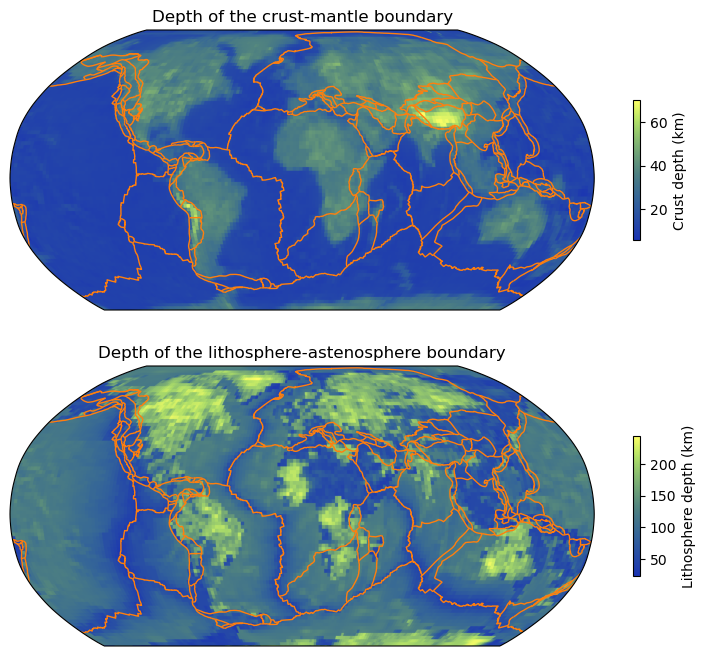

In [78]:
fig = pl.figure(figsize=(10, 8))

axs = [fig.add_subplot(2,1,i, projection=proj) for i in range(1, 3)]

for ax in axs:
  plate_bnd_plot = plate_bnd.plot(ax=ax, zorder=1, color="tab:orange", lw=1.0,
                                  transform=ccrs.PlateCarree())
l1 = axs[0].imshow(depth_crust / 1000.0,
                   transform=ccrs.PlateCarree(), cmap="cmc.imola")
l2 = axs[1].imshow(depth_lithosphere  / 1000.0,
                   transform=ccrs.PlateCarree(), cmap="cmc.imola")


cb1 = fig.colorbar(l1, ax=axs[0], shrink=0.5)
cb1.set_label("Crust depth (km)")

cb2 = fig.colorbar(l2, ax=axs[1], shrink=0.5)
cb2.set_label("Lithosphere depth (km)")

axs[0].set_title("Depth of the crust-mantle boundary")

axs[1].set_title("Depth of the lithosphere-astenosphere boundary")

## 4.1 Calculate depth as fraction of crustal thickness

To visualize how the eartquakes are distributed within the crust and the lithosphere we calculate the relative depth for each earthquake compared to the depth of the crust-mantle boundary, and the depth of the lithosphere-astenopshere boundary. To be able to visualize the distance to both of these boundaries, we will assign a value of 0 to 1 if the earthquake is in the crust, starting with 0 if the earthquake is at the land surface, and a value of 1.0 if the earthquake is at the bottom of the crust. We will assing a value between 1 and 2 if the earthquake is in the mantle lithosphere (i.e. below the crust), starting at 1 if the earthquake is at the bottom of the crust, to a value of 2.0 if the earthquake is at the bottom of the lithosphere. We will assing values exceeding 2.0 if the earthquakes happen in the astenosphere, with the value reflecting the distance compared to the thickness of the lithosphere.

In [79]:
# covert depths to m
gdf["depth_m"] = gdf["depth"] * 1000.0

# calculate the relative depth of earthquakes in the crust
gdf["relative_depth_crust"] = gdf["depth_m"] / gdf["depth_crust"]

# calculate the relative depth of each of the earthquakes in the lithosphere
gdf["relative_depth_lithosphere"] = (gdf["depth_m"] - gdf["depth_crust"]) / (gdf["depth_lithosphere"] - gdf["depth_crust"])

# assign relative depth in the crust to all points that are actually inside the crust
ixc = gdf["depth_m"] < gdf["depth_crust"]
gdf.loc[ixc, "relative_depth"] =  gdf.loc[ixc, "relative_depth_crust"]

# assign the 1 + relative depth in the lithosphere to all points below the crust
ixl = gdf["depth_m"] >= gdf["depth_crust"]
gdf.loc[ixl, "relative_depth"] =  gdf.loc[ixl, "relative_depth_lithosphere"] + 1.0

Next, lets visualize the relative depth distribution of earthquakes in the crust and lithosphere:

Text(0, 0.5, 'Number of earthquakes')

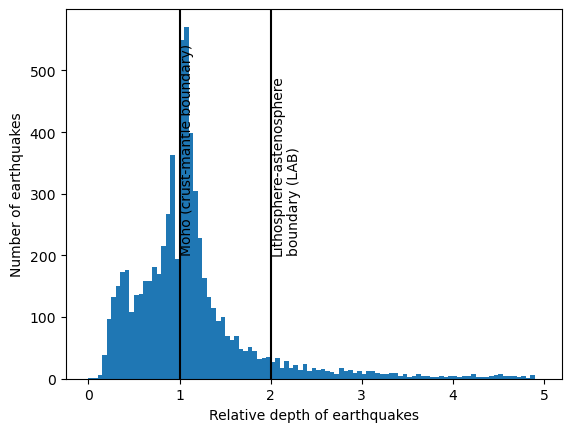

In [80]:
# create a figure and a single subplot
fig, ax = pl.subplots(1, 1)

# make a histogram of the relative depths
ax.hist(gdf["relative_depth"], bins=np.arange(0, 5, 0.05))

# add vertical lines and text to indicate 
# the crust-mantle boundary and the lithosphere-astenosphere boundary
ax.axvline(x=1, color="black")
ax.axvline(x=2, color="black")
ax.text(1.0, 200, "Moho (crust-mantle boundary)", va="bottom", rotation=90)
ax.text(2.0, 200, "Lithosphere-astenosphere\nboundary (LAB)",
            va="bottom", rotation=90)

# label the axes
ax.set_xlabel("Relative depth of earthquakes")
ax.set_ylabel("Number of earthquakes")

As you can see above the eartquake clustering in the crust and the lithosphere is not uniform, but earthquakes cluster at certain depths.

## 4.2 Earthquake clustering and plate boundaries

We can repeat the analysis above for the different plate boundaries, to see if there are significant differences between them:

Text(0.5, 0, 'Relative depth of earthquakes\nin the crust and lithosphere')

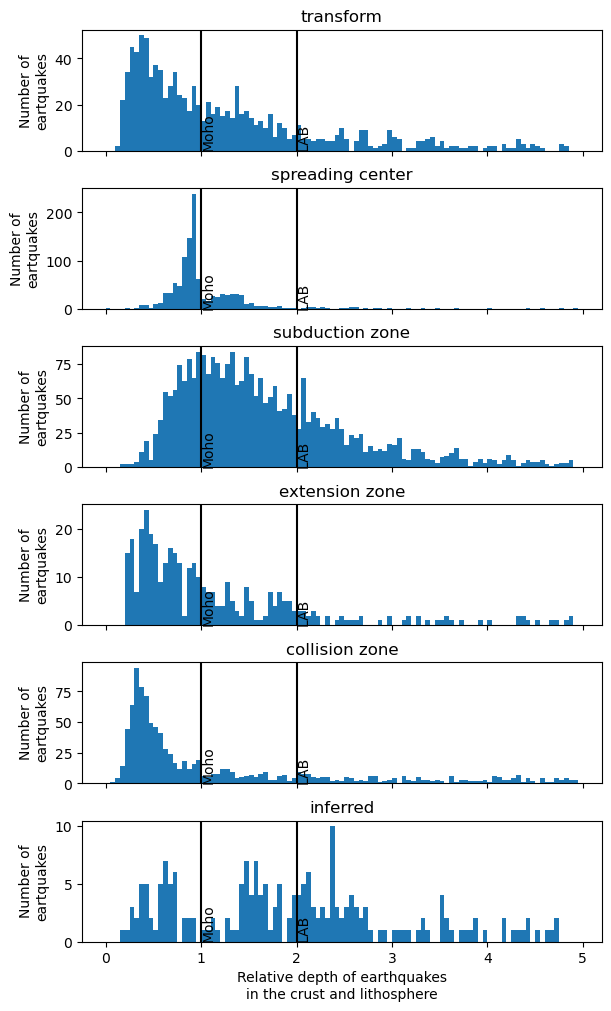

In [81]:
fig, axs = pl.subplots(6, 1, sharex=True, figsize=(6, 10), layout="constrained")
#axs = axs.ravel()
for pt, ax in zip(plate_types, axs):

    idx = gdf["plate_bnd_type"] == pt
    gdfi = gdf.loc[idx]

    ax.hist(gdfi["relative_depth_crust"], bins=np.arange(0, 5, 0.05))
    ax.axvline(x=1, color="black")
    ax.axvline(x=2, color="black")
    ax.text(1.0, 0, "Moho", va="bottom", rotation=90)
    ax.text(2.0, 0, "LAB", va="bottom", rotation=90)

    ax.set_title(pt)
    ax.set_ylabel("Number of\neartquakes")

axs[-1].set_xlabel("Relative depth of earthquakes\nin the crust and lithosphere")
#axs[-1, 1].set_xlabel("Relative depth in lithosphere")


---

# **ASSIGNMENT 4.1: Answer the research questions**

Now that you have finished the analysis of global earthquake data, let's see what we can learn from the results of the analysis, and try and answer the research questions.

1. What is the spatial and depth distribution of earthquakes globally, and how is the magnitude distributed?
2. What is the relation between the location of plate boundaries and earthquakes?
3. How do the different types of plate boundaries affect the depth, magnitude and spatial distribution of earthquakes?
4. What is the relation between the crust and lithosphere and the distribution of earthquakes?


**Formulate an answer for each of the research questions that were defined at the end of the introduction in the text block below**. Motivate your answer, and support all your answers on the results of the analysis of the data.

---

*Add your answer to the research questions from the introduction. Make sure to give each answer the same number as the corresponding question, and write each answer in a separate paragraph, separated from the preceding paragraph by an empty line. Base your answer on the results of the data analysis.*

---

---

# **ASSIGNMENT 4.2 (optional): Find scientific explanations**

In our analysis we did not address the why question yet. 

1. Why are earthquakes distributed in depth and in space the way they are for the different plate boundaries? 
2. Why is there such a difference between the boundaries? 
3. Why do earthquakes cluster around certain depths in the crust and lithosphere? 

Try to find answers to the questions above in the scientific literature. A good start as usual is looking at Wikipedia, or asking Copilot. Next try to look at figures or explanations in the scientific literature that they cite, or try to find research papers yourself using google scholar: https://scholar.google.com/

---

*Add your answer to the bonus assignment here*

---

# Done!

Congrats, you managed to complete the exercise. We hope you enjoyed learning about earthquakes, plate tectonics and the internal structure of our planet. This was the last exercise in this module, next up is a module on weather and climate, where you will encounter another important part of the earth sciences, computer models to simulate processes on our planet.

As always we would be very happy with feedback to improve this part of the course. Use the feedback form in mitt.uib, or the IEarth feedback QR code that is in the exercise description on mitt.uib.